# **Feature Selection - Information gain - Mutual Information in Classification Problem Statements**

Mutual Information

MI estimates mutual information for a discrete target variable.

MI between two random variables, which measures the dependency between the variables. It is qual to zero if and only if two random variables are independent, and higher values means higher dependency.

A quantity called mutual information measures the amount of information one can obtain from one random variable given another. 


In [3]:
#I(X;Y) = H(X)-H(X|Y)

#dependent and independent dependency we are checking

In [2]:
import pandas as pd

In [4]:
data='https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'
df = pd.read_csv(data)

In [5]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df['Wine'].unique()  #three wine classes

array([1, 2, 3])

In [8]:
df.info() #check the data types are correct or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
x=df.drop(labels=['Wine'],axis=1)
y=df['Wine']

In [10]:
#To avoid overfitting, we always do train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [11]:
x_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [12]:
#H is entropy
from sklearn.feature_selection import mutual_info_classif
#determinig the mutual information
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info
#highest value is most important feature

array([0.41784222, 0.31765324, 0.13646074, 0.21917816, 0.16911313,
       0.46633047, 0.72015112, 0.12481934, 0.27684961, 0.61110756,
       0.53829856, 0.54854941, 0.53839133])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns #setting column names
mutual_info.sort_values(ascending=False)

Flavanoids              0.720151
Color.int               0.611108
OD                      0.548549
Proline                 0.538391
Hue                     0.538299
Phenols                 0.466330
Alcohol                 0.417842
Malic.acid              0.317653
Proanth                 0.276850
Acl                     0.219178
Mg                      0.169113
Ash                     0.136461
Nonflavanoid.phenols    0.124819
dtype: float64

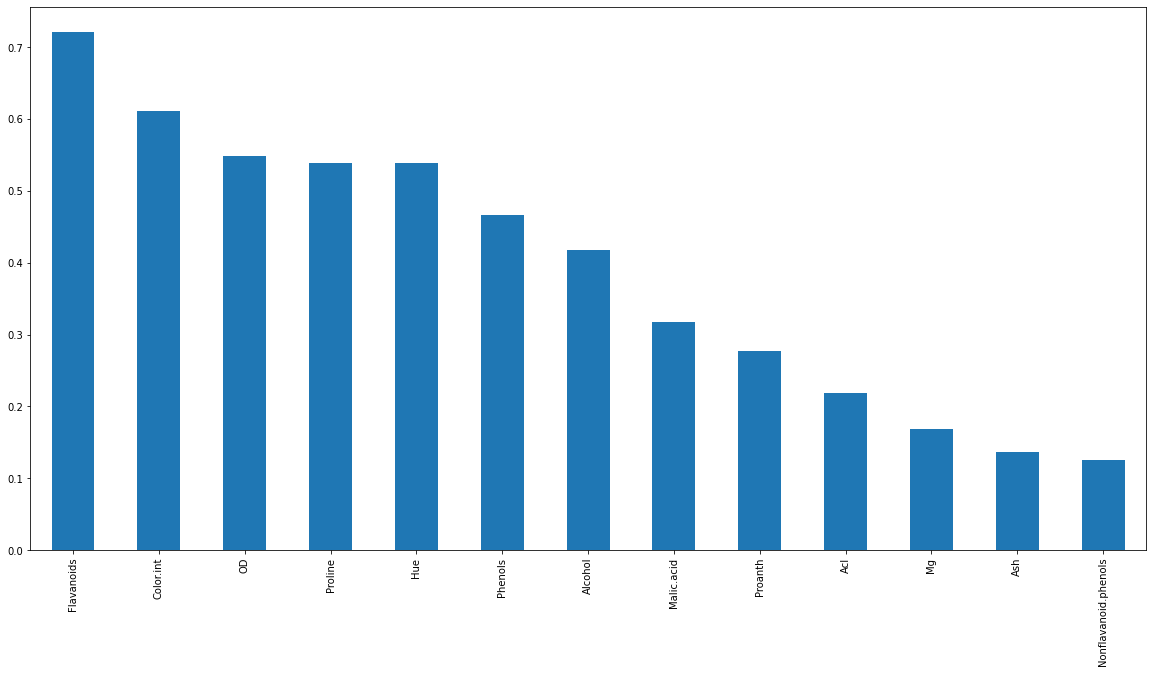

In [18]:
#plotting
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))

In [20]:
#SelectKBest = picking top 10 of the important features
from sklearn.feature_selection import SelectKBest

In [24]:
#Selecting the top 10 important features
top_ten_cols = SelectKBest(mutual_info_classif,k=10)
top_ten_cols.fit(x_train,y_train)
x_train.columns[top_ten_cols.get_support()]

Index(['Alcohol', 'Malic.acid', 'Acl', 'Phenols', 'Flavanoids', 'Proanth',
       'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

# mutual information works with entropy(important)